# Introduction

* More than one class to predict
* Fashion MNIST dataset. https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the Data

In [2]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Visulize the data

In [3]:

np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [5]:
labels = {0	: "T-shirt/top",
          1:"Trouser",
          2:"Pullover",
          3:"Dress",
          4:"Coat",
          5:"Sandal",
          6:"Shirt",
          7:"Sneaker",
          8:"Bag",
          9:"Ankle boot"
          }

(<matplotlib.image.AxesImage at 0x7fa0c18a8250>, 'Ankle boot')

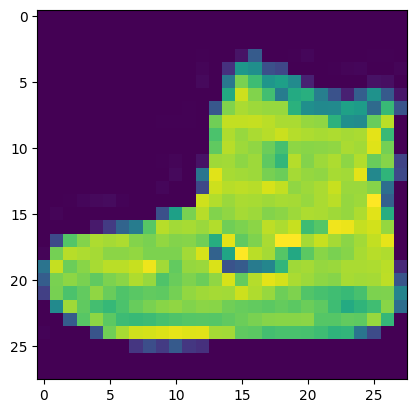

In [6]:
plt.imshow(X_train[0]) , labels[y_train[0]]

(<matplotlib.image.AxesImage at 0x7fa0be3305e0>, 'Pullover')

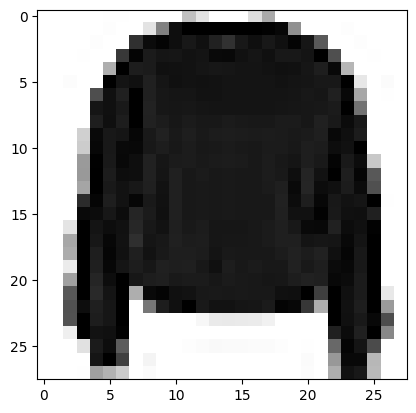

In [7]:
plt.imshow(X_train[7], cmap=plt.cm.binary) , labels[y_train[7]]

(<matplotlib.image.AxesImage at 0x7fa0bc1a8940>, 'Dress')

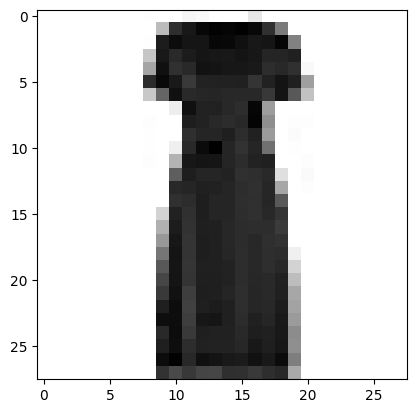

In [8]:
plt.imshow(X_train[50], cmap=plt.cm.binary) , labels[y_train[50]]

In [9]:
X_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

In [10]:
# It is a 2D vector
X_train[7].shape

(28, 28)

In [11]:
# It is a scalar
y_train[7].shape

()

# Spliting the data

In [12]:
from sklearn.model_selection import train_test_split
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42,stratify=y_train)

In [13]:
X_train_2.shape, y_train_2.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((48000, 28, 28),
 (48000,),
 (12000, 28, 28),
 (12000,),
 (10000, 28, 28),
 (10000,))

# Build, compile, Fit and Evaluate model

## Experiment - 1

In [14]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
                            layers = [
                                       tf.keras.Input(shape=(28,28)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(units=4, activation="relu"),
                                       tf.keras.layers.Dense(units=4, activation="relu"),
                                       tf.keras.layers.Dense(units=10, activation="softmax")

                            ]
)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


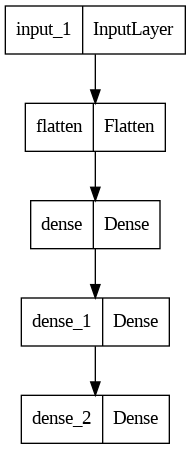

In [15]:
tf.keras.utils.plot_model(model_1)

In [16]:
model_1.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}}, {"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}

In [17]:
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"]
                )

In [18]:
hist_1 = model_1.fit(X_train_2, y_train_2,
                     epochs=10,
                     validation_data=(X_val,y_val))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 3.2327 - accuracy: 0.1061 - val_loss: 2.2758 - val_accuracy: 0.1128
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2867 - accuracy: 0.1103 - val_loss: 2.2568 - val_accuracy: 0.1233
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2730 - accuracy: 0.1172 - val_loss: 2.2379 - val_accuracy: 0.1284
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.9133 - accuracy: 0.2028 - val_loss: 1.5891 - val_accuracy: 0.2852
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5932 - accuracy: 0.2869 - val_loss: 1.5216 - val_accuracy: 0.3128
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.5889 - accuracy: 0.3066 - val_loss: 1.6017 - val_accuracy: 0.2615
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6043 - accuracy: 0.3145 - val_loss: 1.6400 - val_accuracy:

<Axes: >

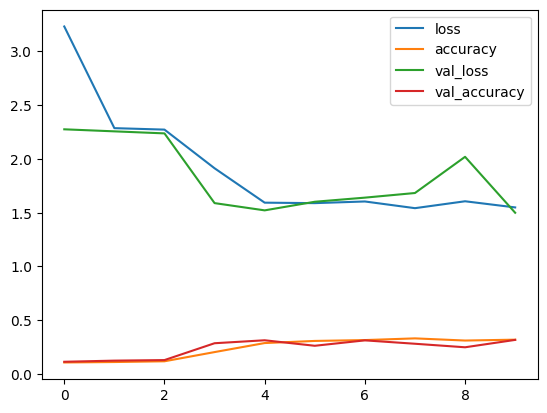

In [19]:
pd.DataFrame(hist_1.history).plot()

In [20]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.5103 - accuracy: 0.3159


[1.5102639198303223, 0.3158999979496002]

## Experiment - 2

* Normilization of input Data

In [21]:
X_train_norm = X_train_2/255.0
X_val_norm = X_val/255.0
X_test_norm = X_test/255.0

In [22]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(
                                [
                                    tf.keras.Input(shape=(28,28)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=4, activation="relu"),
                                    tf.keras.layers.Dense(units=4, activation="relu"),
                                    tf.keras.layers.Dense(units=10, activation="softmax"),

                                ]
)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"]
                )

In [24]:
hist_2 = model_2.fit(X_train_norm, y_train_2, epochs=10,
                     validation_data=(X_val_norm, y_val))

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9873 - accuracy: 0.6383 - val_loss: 0.7953 - val_accuracy: 0.6896
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7943 - accuracy: 0.7098 - val_loss: 0.7875 - val_accuracy: 0.7117
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7588 - accuracy: 0.7228 - val_loss: 0.7379 - val_accuracy: 0.7343
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7520 - accuracy: 0.7239 - val_loss: 0.7777 - val_accuracy: 0.7280
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7433 - accuracy: 0.7278 - val_loss: 0.7460 - val_accuracy: 0.7240
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7356 - accuracy: 0.7323 - val_loss: 0.7266 - val_accuracy: 0.7243
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7308 - accuracy: 0.7339 - val_loss: 0.7451 - val_accuracy:

<Axes: >

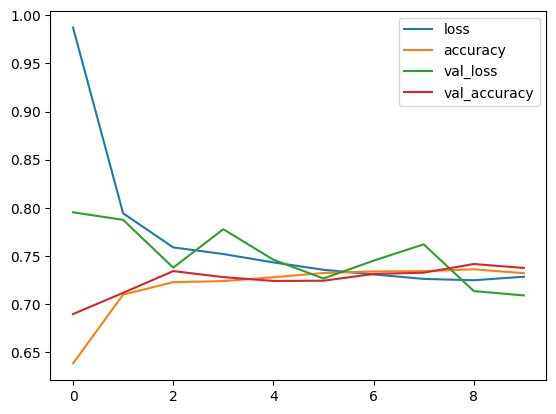

In [25]:
pd.DataFrame(hist_2.history).plot()

In [26]:
model_2.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.7365 - accuracy: 0.7340


[0.7364829182624817, 0.734000027179718]

## Experiment - 3

* Finding out ideal learning rate by call backs

In [27]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential(
                                [
                                    tf.keras.Input(shape=(28,28)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=4, activation="relu"),
                                    tf.keras.layers.Dense(units=4, activation="relu"),
                                    tf.keras.layers.Dense(units=10, activation="softmax"),

                                ]
)
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"]
                )

In [29]:
learning_rate_schudler = tf.keras.callbacks.LearningRateScheduler(schedule=lambda epoch : 1e-3 * 10**(epoch/20), verbose=1)

In [30]:
hist_3 = model_3.fit(X_train_norm, y_train_2, epochs=40,
                     validation_data=(X_val_norm, y_val),
                     callbacks=[learning_rate_schudler])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1565 - accuracy: 0.5943 - val_loss: 0.7978 - val_accuracy: 0.7347 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0011220184543019635.
Epoch 2/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7534 - accuracy: 0.7474 - val_loss: 0.7101 - val_accuracy: 0.7598 - lr: 0.0011

Epoch 3: LearningRateScheduler setting learning rate to 0.0012589254117941673.
Epoch 3/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6922 - accuracy: 0.7663 - val_loss: 0.6648 - val_accuracy: 0.7734 - lr: 0.0013

Epoch 4: LearningRateScheduler setting learning rate to 0.0014125375446227544.
Epoch 4/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6617 - accuracy: 0.7760 - val_loss: 0.6477 - val_accuracy: 0.7822 - lr: 0.0014

Epoch 5: LearningRateScheduler setting learning rate to 0.001584893

<Axes: >

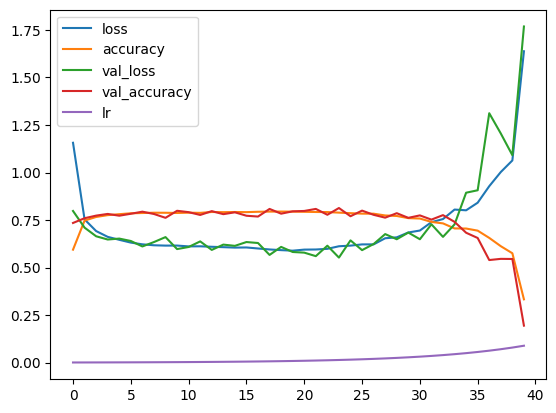

In [31]:
pd.DataFrame(hist_3.history).plot()

<Axes: >

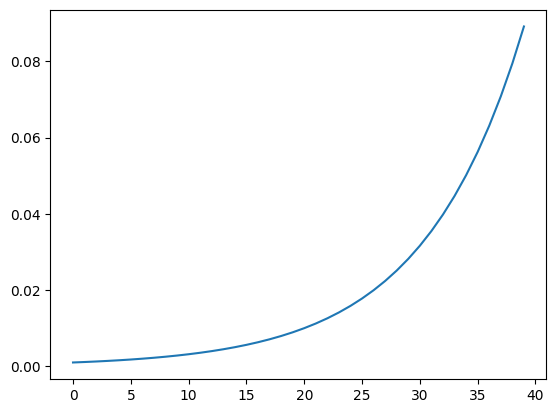

In [32]:
pd.DataFrame(hist_3.history)["lr"].plot()

<Axes: >

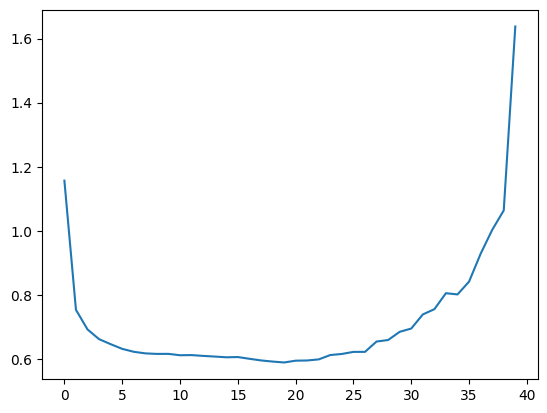

In [33]:
pd.DataFrame(hist_3.history)["loss"].plot()

Default learning rate 0.001 is the best learning rate for this usecase

## Experiment - 4

In [72]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential(
                                [
                                    tf.keras.Input(shape=(28,28)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=4, activation="relu"),
                                    tf.keras.layers.Dense(units=4, activation="relu"),
                                    tf.keras.layers.Dense(units=10, activation="softmax"),

                                ]
)
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"]
                )

In [74]:
hist_4 = model_4.fit(X_train_norm, y_train_2, epochs=20,
                     validation_data=(X_val_norm, y_val)
                     )

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3347 - accuracy: 0.4445 - val_loss: 1.1599 - val_accuracy: 0.5238
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0754 - accuracy: 0.5697 - val_loss: 0.9975 - val_accuracy: 0.6278
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.9450 - accuracy: 0.6206 - val_loss: 0.9029 - val_accuracy: 0.6418
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9076 - accuracy: 0.6273 - val_loss: 0.9059 - val_accuracy: 0.6279
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8690 - accuracy: 0.6333 - val_loss: 0.8628 - val_accuracy: 0.6276
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.8452 - accuracy: 0.6368 - val_loss: 0.8196 - val_accuracy: 0.6544
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8179 - accuracy: 0.6789 - val_loss: 0.8107 - val_accuracy:

<Axes: >

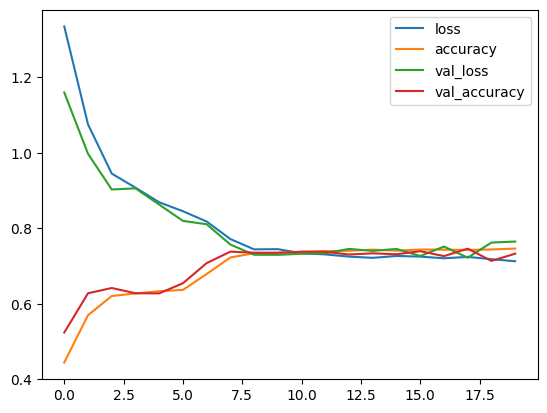

In [75]:
pd.DataFrame(hist_4.history).plot()

## Experiment - 5

* Training for more epochs

In [80]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential(
                                [
                                    tf.keras.Input(shape=(28,28)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=4, activation="relu"),
                                    tf.keras.layers.Dense(units=4, activation="relu"),
                                    tf.keras.layers.Dense(units=10, activation="softmax"),

                                ]
)
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [81]:
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"]
                )

In [82]:
hist_5 = model_5.fit(X_train_norm, y_train_2, epochs=50,
                     validation_data=(X_val_norm, y_val)
                     )

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 1.1699 - accuracy: 0.4924 - val_loss: 0.9164 - val_accuracy: 0.6232
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9186 - accuracy: 0.6244 - val_loss: 0.8980 - val_accuracy: 0.6273
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8764 - accuracy: 0.6412 - val_loss: 0.8819 - val_accuracy: 0.6478
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8571 - accuracy: 0.6501 - val_loss: 0.8983 - val_accuracy: 0.6377
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8483 - accuracy: 0.6532 - val_loss: 0.8199 - val_accuracy: 0.6663
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8432 - accuracy: 0.6558 - val_loss: 0.8353 - val_accuracy: 0.6619
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8377 - accuracy: 0.6576 - val_loss: 0.8697 - val_accuracy:

<Axes: >

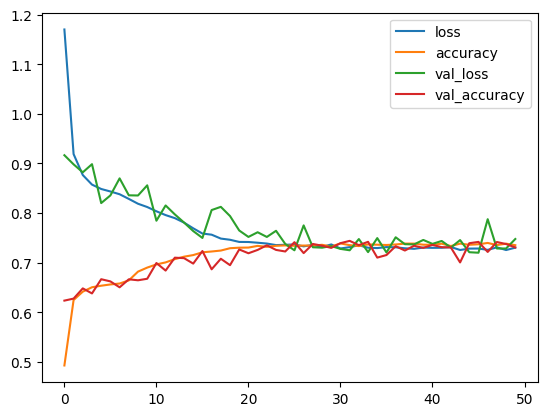

In [83]:
pd.DataFrame(hist_5.history).plot()

# Evaluating models on more other metrics

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_1 = model_1.predict(X_test_norm)
print(y_pred_1[1])
y_pred_1[1].argmax()

313/313 [==============================] - 0s 790us/step
[1.6342874e-01 1.6742355e-01 1.6354923e-01 1.5242101e-01 1.6540202e-01
 6.1120089e-05 1.6558714e-01 4.4046564e-04 1.8763274e-02 2.9235436e-03]


1

In [43]:
y_pred_1.argmax(axis=1).shape

(10000,)

In [44]:
y_test.shape

(10000,)

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [45]:
def get_metrics(y_test, y_pred):
    acc = accuracy_score(y_true=y_test, y_pred=y_pred.argmax(axis=1))
    pre = precision_score(y_true=y_test, y_pred=y_pred.argmax(axis=1),average="macro")
    recal = recall_score(y_true=y_test, y_pred=y_pred.argmax(axis=1),average="macro")
    f1_sc = f1_score(y_true=y_test, y_pred=y_pred.argmax(axis=1),average="macro")
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred.argmax(axis=1))
    return {"accuracy" : acc,
            "precision" : pre,
            "recal" : recal,
            "f1-score" :f1_sc,
            # "confusion_matrix" : cm
            }, cm

In [59]:
metrics = get_metrics(y_test, y_pred_1)
metrics

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'accuracy': 0.196,
  'precision': 0.06282665587570666,
  'recal': 0.196,
  'f1-score': 0.07025986661565276},
 array([[  0, 963,   0,   0,   0,   0,   9,   0,  28,   0],
        [  0, 998,   0,   0,   0,   0,   0,   0,   2,   0],
        [  0, 954,   0,   0,   0,   0,  17,   0,  29,   0],
        [  0, 992,   0,   0,   0,   0,   6,   0,   2,   0],
        [  0, 984,   0,   0,   0,   0,   4,   0,  12,   0],
        [  0,   3,   0,   0,   0,   0,   1,   0, 872, 124],
        [  0, 933,   0,   0,   0,   0,  15,   0,  52,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0, 999,   1],
        [  0,  39,   0,   0,   0,   0,  14,   0, 947,   0],
        [  0,  12,   0,   0,   0,   0,   3,   0, 985,   0]]))

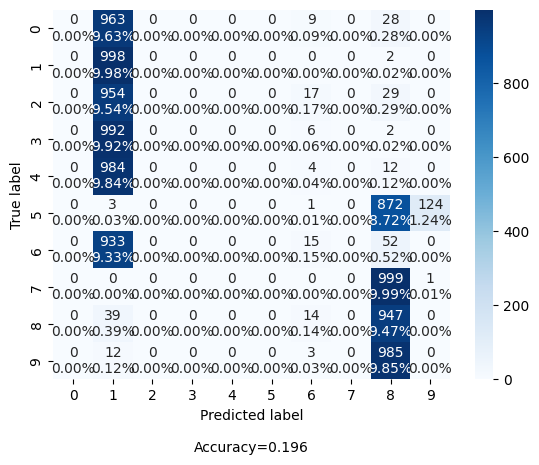

In [60]:
make_confusion_matrix(metrics[1])

In [84]:
y_pred_2 = model_2.predict(X_test_norm)
metrics = get_metrics(y_test, y_pred_2)
metrics

313/313 [==============================] - 0s 875us/step


({'accuracy': 0.734,
  'precision': 0.7300202449677365,
  'recal': 0.734,
  'f1-score': 0.7273886872138513},
 array([[709,   4,  29, 157,  26,   1,  70,   0,   4,   0],
        [  5, 911,   3,  65,   3,   1,  10,   0,   2,   0],
        [ 26,   0, 519,  16, 270,   0, 162,   1,   6,   0],
        [ 50,  29,   7, 812,  31,   2,  66,   0,   3,   0],
        [  6,   0, 122,  39, 719,   1,  92,   0,  21,   0],
        [  0,   0,   0,   0,   1, 843,   0,  74,  54,  28],
        [175,   1, 222,  99, 298,   2, 197,   0,   6,   0],
        [  0,   0,   0,   0,   0,  39,   0, 916,   0,  45],
        [  0,   1,   7,   8,  84,  22,   6,   3, 868,   1],
        [  0,   0,   0,   0,   1,  68,   0,  75,  10, 846]]))

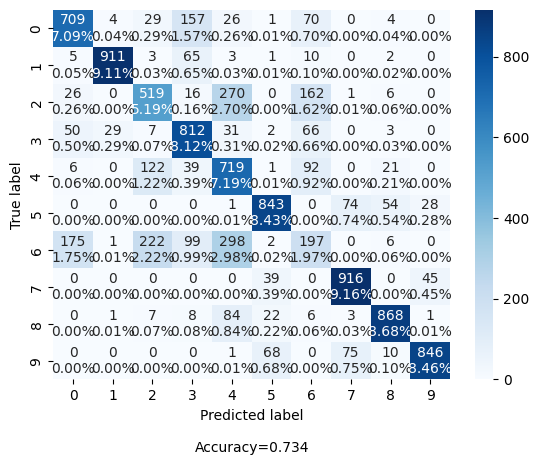

In [85]:
make_confusion_matrix(metrics[1])

In [86]:
y_pred_3 = model_3.predict(X_test_norm)
metrics = get_metrics(y_test, y_pred_3)
metrics

313/313 [==============================] - 0s 897us/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'accuracy': 0.1948,
  'precision': 0.08955245988353257,
  'recal': 0.1948,
  'f1-score': 0.06621708963073906},
 array([[   0,    0,    0,    0,    0,    0,    0,   13,  987,    0],
        [   0,    0,    0,    1,    0,    0,    0,  907,   92,    0],
        [   0,    0,    0,    0,    0,    0,    0,    1,  999,    0],
        [   0,    1,    0,    3,    0,    0,    0,  455,  541,    0],
        [   0,    0,    0,    1,    0,    0,    0,    9,  990,    0],
        [   0,    0,    0,    0,    0,    0,    0,  992,    8,    0],
        [   0,    0,    0,    0,    0,    0,    0,    5,  995,    0],
        [   0,    0,    0,    0,    0,    0,    0, 1000,    0,    0],
        [   0,    0,    0,    0,    0,    0,    0,   55,  945,    0],
        [   0,    0,    0,    1,    0,    0,    0,  997,    2,    0]]))

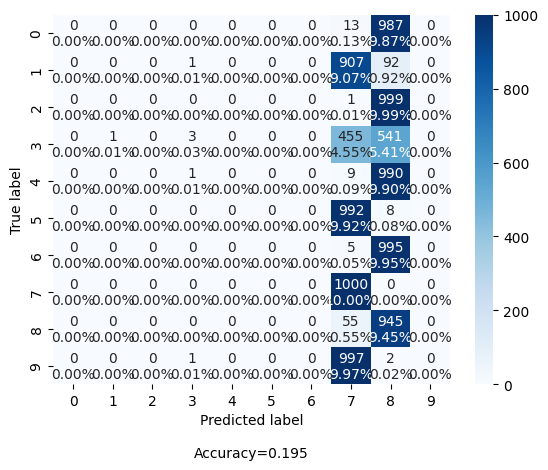

In [87]:
make_confusion_matrix(metrics[1])

In [88]:
y_pred_4 = model_4.predict(X_test_norm)
metrics = get_metrics(y_test, y_pred_4)
metrics

313/313 [==============================] - 0s 860us/step


({'accuracy': 0.7282,
  'precision': 0.7347932234411354,
  'recal': 0.7282,
  'f1-score': 0.7228015052321856},
 array([[737,   4,  20, 119,  11,   4,  85,   0,  20,   0],
        [ 24, 919,   1,  45,   2,   0,   7,   0,   2,   0],
        [ 41,   0, 376,   9, 292,   3, 244,   0,  35,   0],
        [ 52,  20,   1, 743,   4,  29, 110,  11,  30,   0],
        [  5,   0,  24,  22, 676,   0, 163,   0, 110,   0],
        [  0,   0,   0,   0,   0, 834,   0,  75,  10,  81],
        [171,   0,  58,  65, 302,   2, 329,   0,  73,   0],
        [  0,   0,   0,   1,   0,  36,   0, 881,   0,  82],
        [  1,   0,   4,   6,  18,  84,  12,   3, 870,   2],
        [  0,   0,   0,   0,   0,  35,   0,  47,   1, 917]]))

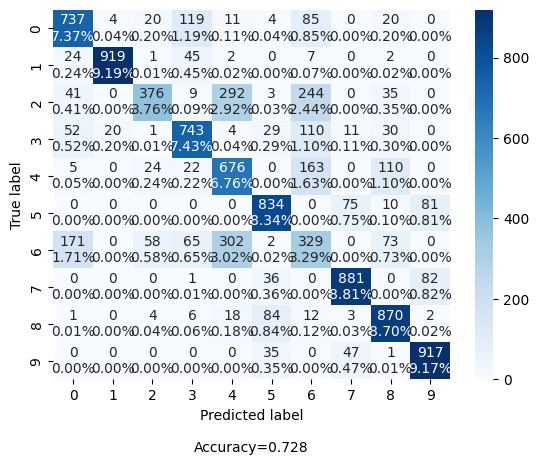

In [89]:
make_confusion_matrix(metrics[1])

In [90]:
y_pred_5 = model_5.predict(X_test_norm)
metrics = get_metrics(y_test, y_pred_5)
metrics

313/313 [==============================] - 0s 796us/step


({'accuracy': 0.7208,
  'precision': 0.7224850915054846,
  'recal': 0.7208,
  'f1-score': 0.7104163897527268},
 array([[756,   5,  30, 140,  26,   1,  31,   0,  11,   0],
        [ 15, 920,   2,  55,   3,   3,   2,   0,   0,   0],
        [105,   0, 337,  22, 234,   1, 297,   0,   4,   0],
        [ 31,   8,   3, 863,  39,  21,  20,   0,   7,   8],
        [  8,   0,  39,  82, 732,   2, 122,   0,  15,   0],
        [  0,   0,   0,  16,   0, 866,   0,  75,  14,  29],
        [193,   1,  78, 116, 369,   0, 218,   0,  25,   0],
        [  0,   0,   0,   0,   0, 186,   0, 752,   1,  61],
        [  1,   0,   4,  10,  65,  41,   3,   3, 873,   0],
        [  0,   0,   0,   3,   1,  23,   0,  82,   0, 891]]))

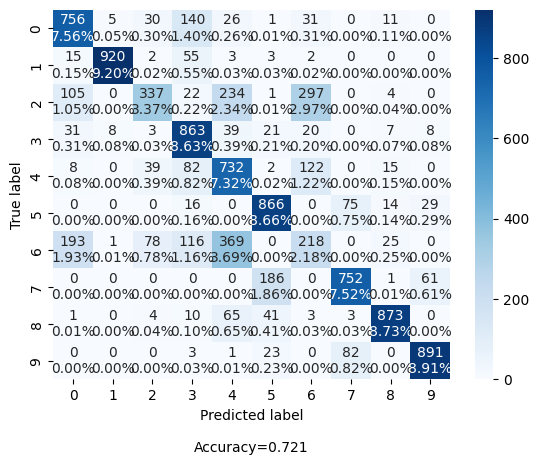

In [91]:
make_confusion_matrix(metrics[1])

## Experiment - 6

Giving more weightage to class 6 while trianing

In [51]:
class_weights = { 0 : 0.8 ,
                 1 : 0.8 ,
                 2 : 0.8 ,
                 3 : 0.8 ,
                 4 : 0.8 ,
                 5 : 0.8 ,
                 6 : 1.5 ,
                 7 : 0.8 ,
                 8 : 0.8 ,
                 9 : 0.8 ,
                  }

In [52]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential(
                                [
                                    tf.keras.Input(shape=(28,28)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=4, activation="relu"),
                                    tf.keras.layers.Dense(units=4, activation="relu"),
                                    tf.keras.layers.Dense(units=10, activation="softmax"),

                                ]
)
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"]
                )

In [54]:
hist_6 = model_6.fit(X_train_norm, y_train_2, epochs=50,
                     validation_data=(X_val_norm, y_val),
                     class_weight=class_weights
                     )

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9507 - accuracy: 0.5340 - val_loss: 0.9409 - val_accuracy: 0.6084
Epoch 2/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7896 - accuracy: 0.6174 - val_loss: 0.8345 - val_accuracy: 0.6494
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7550 - accuracy: 0.6361 - val_loss: 0.8368 - val_accuracy: 0.6572
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7440 - accuracy: 0.6460 - val_loss: 0.8818 - val_accuracy: 0.6432
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7260 - accuracy: 0.6785 - val_loss: 0.8540 - val_accuracy: 0.6543
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6992 - accuracy: 0.7038 - val_loss: 0.8528 - val_accuracy: 0.6592
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6854 - accuracy: 0.7102 - val_loss: 0.7762 - val_accuracy:

<Axes: >

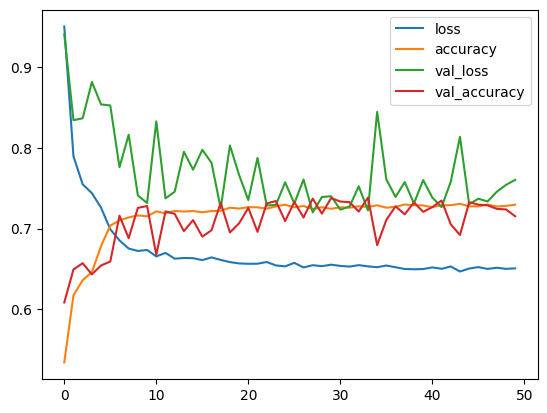

In [55]:
pd.DataFrame(hist_6.history).plot()

In [69]:
y_pred_6 = model_6.predict(X_test_norm)
metrics = get_metrics(y_test, y_pred_6)
metrics

313/313 [==============================] - 0s 825us/step


({'accuracy': 0.709,
  'precision': 0.7670338742683358,
  'recal': 0.7090000000000001,
  'f1-score': 0.7076194896302265},
 array([[795,   1,   1,  58,   5,   2, 130,   0,   8,   0],
        [ 31, 901,   0,  52,   0,   1,  15,   0,   0,   0],
        [ 67,   0, 169,   6,  77,   3, 676,   0,   2,   0],
        [ 62,   8,   0, 780,   3,   7, 134,   1,   4,   1],
        [ 12,   0,  22,  21, 405,   1, 530,   0,   9,   0],
        [  0,   0,   0,   8,   0, 823,   0, 131,  11,  27],
        [213,   1,  25,  42,  60,   1, 644,   0,  14,   0],
        [  0,   0,   0,   0,   0,  82,   0, 850,   0,  68],
        [  1,   0,   1,  10,  57,  63,  46,   5, 814,   3],
        [  0,   0,   0,   2,   0,  10,   1,  78,   0, 909]]))

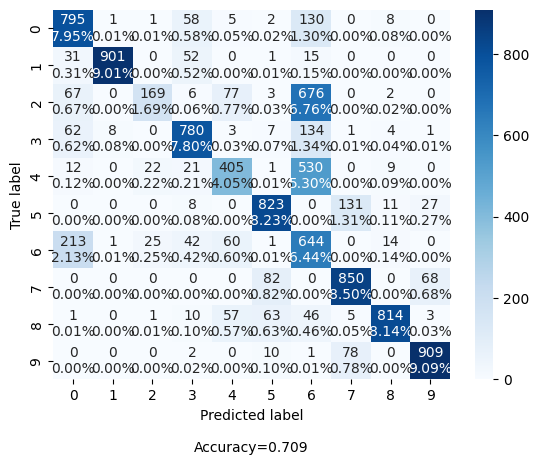

In [70]:
make_confusion_matrix(metrics[1])

# Visulize the random sample image predictions

* Plot a random image
* Get Predicitons of that random image
* Compare the predicitons with real labels

In [190]:
import random
def plot_random_image(model,images,true_labels,classes):
    i=random.randint(0, len(images))
    test_sample = images[i]/255
    plt.imshow(test_sample, cmap=plt.cm.binary)
    y_pred=model.predict(test_sample.reshape(1,28,28))
    predicted_class = y_pred.argmax()
    if predicted_class == true_labels[i]:
        plt.title("Correctly Predicted !!",fontdict={"color": "green"})
    else:
        plt.title("Wrongly Predicted !!",fontdict={"color": "red"})
    print("Predicted : " , classes[predicted_class] , "--", round(y_pred[0][predicted_class]*100,2) )
    print("Real : " , classes[true_labels[i]])
    pass

1/1 [==============================] - 0s 17ms/step
Predicted :  Trouser -- 98.47
Real :  Trouser


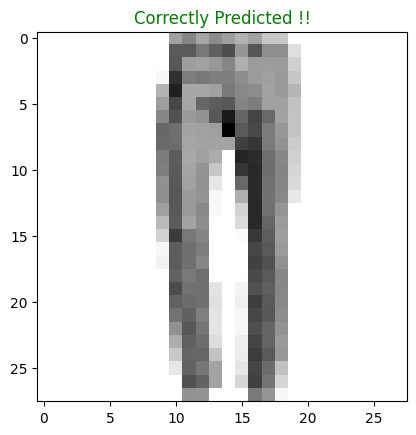

In [203]:
plot_random_image(model_5,
                  images=X_test,
                  true_labels=y_test,
                  classes=labels)

# Intrepreting Models

In [204]:
model_5.layers

In [205]:
model_5.layers[1]

In [208]:
weights, biases = model_5.layers[1].get_weights()
weights, weights.shape

(array([[ 4.30610180e-02,  1.36113701e+01,  1.36461928e-02,
         -1.49551857e+00],
        [ 5.22764176e-02, -2.61929059e+00, -3.96570079e-02,
          1.32728281e+01],
        [-7.19258934e-02,  2.87676263e+00, -1.61569547e-02,
         -9.78277206e+00],
        ...,
        [-1.08383514e-01, -8.30245018e-01, -7.93293640e-02,
         -1.53602219e+00],
        [ 5.06097078e-03, -2.90759087e+00, -5.03767841e-02,
         -1.57926130e+00],
        [ 7.28742778e-03,  8.63592529e+00,  6.77297413e-02,
         -1.59990704e+00]], dtype=float32),
 (784, 4))

In [209]:
biases, biases.shape

(array([-0.06005339, 23.400047  , -0.06005249, 21.047562  ], dtype=float32),
 (4,))

In [221]:
for i in range (0,len(model_5.layers)):
    print(model_5.layers[i].get_weights())
    print("-"*100)

[]
----------------------------------------------------------------------------------------------------
[array([[ 4.30610180e-02,  1.36113701e+01,  1.36461928e-02,
        -1.49551857e+00],
       [ 5.22764176e-02, -2.61929059e+00, -3.96570079e-02,
         1.32728281e+01],
       [-7.19258934e-02,  2.87676263e+00, -1.61569547e-02,
        -9.78277206e+00],
       ...,
       [-1.08383514e-01, -8.30245018e-01, -7.93293640e-02,
        -1.53602219e+00],
       [ 5.06097078e-03, -2.90759087e+00, -5.03767841e-02,
        -1.57926130e+00],
       [ 7.28742778e-03,  8.63592529e+00,  6.77297413e-02,
        -1.59990704e+00]], dtype=float32), array([-0.06005339, 23.400047  , -0.06005249, 21.047562  ], dtype=float32)]
----------------------------------------------------------------------------------------------------
[array([[ 0.5790379 , -0.38278666,  0.51668704,  0.27526304],
       [-0.20875104, -0.60287935,  0.3066254 , -0.0637031 ],
       [ 0.6987293 ,  0.8240173 , -0.23399743, -0.867038